# Computational Physics

## Assignment Week 11

### Group 3

1. Please download **demo_midpoint.zip** und unpack it. What is the purpose of the main script `demo_midpoint.py`? What conclusion can you make by running the script? 

Sol: The main script `demo_midpoint.py` aims at testing the efficiency (speed) of the two midpoint integral algorithm by separately run them for 10 times. The result shows the algorithm in `integration_methods_vec.py` is 30 times faster than the one in 'midpoint.py`.

The main difference of the two algorithm is that `midpoint.py` use a `for` loop while the other uses vectorize programming. As i have known before, the vectorize programming will be much faster than using iterations in MATLAB, it seems this dogma also works in python. 

2.  Write a function to that numerically estimates the integral
    $$
    A =\int^b_af (x)dx
    $$
    using the trapezoid rule. The simplest version of the trapezoid rule, which generally gives a very crude estimate, is
    $$
    A_0 = \frac{1}{2}h_0[f (a) + f (b)], \; h_0 = b - a
    $$
    This estimate for the integral can be refined by dividing the interval from $a$ to $b$ in two and performing the trapezoid rule on each interval. This process can be repeated as many times as needed until you get the desired precision, which you can estimate by requiring that the fractional difference between successive estimates $(A_i -A_{i-1})/A_i < \epsilon$, where $\epsilon$ might be some small number like 10^-8^.
    
    <img width=600 src=david_trapzoid_rule.png>
    
    Repeatedly applying the trapezoid rule gives the following succession of estimates
    $$\begin{aligned}
    A_1& = \frac{1}{2}h_1[f (a) + f (a + h_1)] + \frac{1}{2}h_1[f (a + h_1) + f (b)],\; h_1 = \frac{1}{2}h_0\\
    &= \frac{1}{2}h_1[f (a) + 2f (a + h_1) + f (b)]\\
    &= \frac{1}{2}A_0 + h_1f (a + h_1)\\
    A_2 &= \frac{1}{2}A_1 + h_2[f (a + h_2) + f (b - h_2)],\; h_2 = \frac{1}{2}h_1\\
    A_3& = \frac{1}{2}A_2 + h_3[f (a + h_3) + f (a + 3h_3) + f (a + 5h_5) + f (b-h_3)],\;h_3 = \frac{1}{2}h_2\\
    &\vdots\\
    A_n &= \frac{1}{2}A_{n-1} + h_n
    \sum_{i=1,3,\cdots}^{2^{n-1}}
    f (a + ih_n),\; h_n = \frac{1}{2}
    h_{n-1},\; \text{for }n\geq 1
    \end{aligned}$$
    Write a function that implements the trapezoid rule by first evaluating $A_0$, then $A_1$, $\cdots$ until $\epsilon$ is less than some preset tolerance. Note that to calculate $A_i$ , by using the previous result $A_{i-1}$, you need only to evaluate the function to be integrated $f (x)$ at the open circles in the preceding diagram, saving a great deal of computation.

    Try your trapezoid integration function on the following integrals
    and show that you get an answer within the specified tolerance of
    the exact value.
    
    (1) $\int_2^5 x^2 dx=39$
    
    (2) $\int_0^\pi \sin x dx =2$
    
    (3) $\int_0^{3.5} e^{-x^2}dx=\frac{\sqrt{\pi}}{2}\text{erf}(3.5)\simeq 0.8862262668989721$

In [1]:
import numpy as np
def trapezoid(func,a,b, e = 1e-6):
    """
    integral function func from a to b with trapezoid method. 
    """
    N = 0
    h = b - a
    eps = np.inf
    Alast =  1 / 2 * ( b - a ) * ( func(b) + func(a) )
    A = Alast
    
    MAX_TIMES = 100      #循环最大次数
    
    while abs(eps) > e:  # 误差大于预设值时循环
        N += 1
        h = h/2
        A = 1/2 * Alast + h * sum(func(a + i*h) for i in np.arange(1,(2**N),2)) #递推公式
        eps = A - Alast
        Alast = A
        MAX_TIMES -= 1
        if MAX_TIMES == 0:
            break
        
    return A

In [2]:
print('误差都取1e-6')

f1 = lambda x : x * x
print(trapezoid(f1,2,5))

f2 = lambda x : np.sin(x)
print(trapezoid(f2,0,np.pi))

f3 = lambda x : np.exp(- x*x )
print(trapezoid(f3,0,3.5))

误差都取1e-6
39.0000002682209
1.999999901954289
0.8862261377360681


可见，都在要求的精度内

3.  (1) Show that composite midpoint method for a double integral:  
    \begin{aligned}
    \int_a^b\int_c^d f(x,y)dydx &\approx h_x\sum_{i=0}^{n_x-1}h_y\sum_{j=0}^{n_y-1}f(x_i,y_j)\\
    &=h_xh_y\sum_{i=0}^{n_x-1}\sum_{j=0}^{n_y-1}f(a+\frac{h_x}{2}+ih_x,c+\frac{h_y}{2}+jh_y)
    \end{aligned}
    
(2) Write a code to implement the above algorithm. Please follow the following three test procedures: 
- (2.a) a test function to compare with hand calculations 
- (2.b) solving a problem without numerical errors. You can take
$$
\int_2^3\int_0^2 (2x+y)dxdy=9
$$
- (2.c Optional) demonstrating correct convergence rates. Computing convergence rates requires somewhat more tedious programming than for the previous tests, the algorithm typically goes like:    
for $i = 0, 1, 2, \cdots ,q$  
– $n_i = 2^{i+1}$  
– Compute integral with $n_i$ intervals   
– Compute the error $E_i$  
– Estimate $r_i$ as  
$$
r_{i-1}=-\frac{\ln(E_i/E_{i-1})}{\ln (n_i/n_{i-1})}
$$

Answer:  
(1) Here we use midpoint rule on both $x$ and $y$:

\begin{aligned}
\int_a^b\int_c^d f(x,y)dydx &\approx \int_c^d \sum_{i=0}^{n_x-1} f(a + h_x + \frac{h_x}{2}, y) h_x dy \\
& \approx h_xh_y\sum_{i=0}^{n_x-1}\sum_{j=0}^{n_y-1}f(a+\frac{h_x}{2}+ih_x,c+\frac{h_y}{2}+jh_y)
\end{aligned}


In [3]:
import numpy as np 
def MidPoint_2D(f, num_x, num_y, xlim, ylim):
    hx = (xlim[1] - xlim[0]) / num_x
    hy = (ylim[1] - ylim[0]) / num_y
    x_space = np.linspace(xlim[0] + hx/2, xlim[1] - hx/2, num_x)
    y_space = np.linspace(ylim[0] + hy/2, ylim[1] - hy/2, num_y)
    
    integral = 0
    for y in y_space:
        integral += np.sum(f(x_space, y) * hx * hy)
    return integral


(2.a) Use $f=xy$ as a test function and (0, 1) as the integral intervals, by hand calculation, the result is:
\begin{aligned}
\int_0^1 \int_0^1 xy \mathrm{d}x \mathrm{d}y &= \int_0^1 \frac{1}{2} y \mathrm{d}y \\
&= \frac{1}{4}
\end{aligned}


In [4]:
# by numerical method:
f_test = lambda x, y: x * y
integral = MidPoint_2D(f_test, 4, 4, [0,1], [0,1])
print(f"By numerical method, result is: {integral}")

print("\n\n(2.b) A solve a test function without error:")

By numerical method, result is: 0.25


(2.b) A solve a test function without error:


In [5]:
f_test_2 = lambda x, y: 2*x + y
integral = MidPoint_2D(f_test_2, 4, 4, [2,3], [0,2])
print(f"By numerical method, result is: {integral}")
print("P.S. the result of real value is actually 12, not 9.")

print("\n\n(2.c)")

By numerical method, result is: 12.0
P.S. the result of real value is actually 12, not 9.


(2.c)


(2.c) let test function as $f=x^{\frac{1}{2}}y^2$, and on the integral (0, 1), the real result is $\frac{2}{9}$

for $i = 0, 1, 2, \cdots ,q$  
– $n_i = 2^{i+1}$  
– Compute integral with $n_i$ intervals   
– Compute the error $E_i$  
– Estimate $r_i$ as  
$$
r_{i-1}=-\frac{\ln(E_i/E_{i-1})}{\ln (n_i/n_{i-1})}
$$

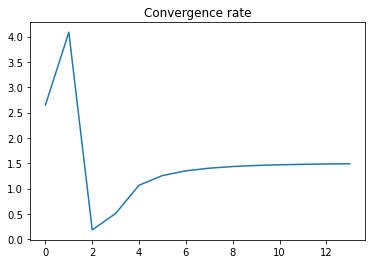

In [6]:
import matplotlib.pyplot as plt
f_test_3 = lambda x, y: x**(1/2) * y**2

integral = MidPoint_2D(f_test_3, 2, 2, [0,1], [0,1])
error_last = abs(integral - 2/9)

iter_num = 15

cov_rate = []
for i in range(1, iter_num):
    n_i = 2**(i+1)
    integral = MidPoint_2D(f_test_3, n_i, n_i, [0,1], [0,1])
    error = abs(integral - 2/9)
    cov_rate.append(-np.log(error/error_last) / np.log(2))
    error_last = error

plt.figure()
plt.title("Convergence rate")
plt.plot(range(iter_num - 1), cov_rate)
plt.show()


4. Please use Romberg integration to obtain a eighth-order accurate approximation to
    (1)
    $$
    \int_{-1}^1 \frac{dx}{1+x^2}=\frac{\pi}{2}
    $$   
    (2) $$
    \int_{-\infty}^{\infty}\frac{dx}{(e^x+x+1)^2+\pi^2}=\frac{2}{3}$$


In [7]:
import numpy as np
def trap(func,a,b,N=100):
    h = (b - a)/N
    x = np.linspace(a,b,N+1)
    fx = func(x)
    return h*np.sum(fx) - h/2 * (fx[0] + fx[-1])

def Romberg(func,a,b,max_ord,h = 0.1):
    """
    设置h，初始的步长会小于h, max_ord指定高阶小量的次数 
    """
    n = int(np.ceil(max_ord / 2))
    T = np.zeros((n,n))
    h_0 = b - a
    h_temp = h_0
    N = 0
    while abs(h_temp)>h:
        N += 1
        h_temp = h_0 / N
    for i in range(0,n):
        T[i,0] = trap(func, a, b, 2**i * N)   #再细分2倍的区间
        
    for k in range(1,n):
        for j in range(0,n-k):
            T[j,k] = (4**k * T[j+1,k-1] - T[j,k-1])/(4**k - 1) #递推公式计算
    
    return T[0,n-1]

In [8]:
f4_1 = lambda x : 1/(1+x**2)
print(r'(1) int_{-1}^{1}\frac{dx}{1+x^2} = ',end = '')
print(Romberg(f4_1,-1,1,8))
print(f'    pi/2 = {np.pi/2}')

(1) int_{-1}^{1}\frac{dx}{1+x^2} = 1.5707963267948966
    pi/2 = 1.5707963267948966


(2)  
分段积分$[-\infty,-1],[-1,1],[1,\infty]$
在$[-\infty,-1],[1,\infty]$上，取x = 1/y,带入
$$
\int_{-\infty(1)}^{-1(\infty)}\frac{dx}{(e^x+x+1)^2+\pi^2}=-\int_{0(1)}^{-1(0)}\frac{dy}{(y e^{1/y}+y +1)^2+y^2\pi^2}
$$

In [9]:
import warnings 
warnings.filterwarnings("ignore")   #e指数计算溢出为inf会报warning，把warning关掉

part1 = lambda x : 1/((np.exp(x)+x+1)**2+np.pi**2)
part2 = lambda x : - 1/( (x*np.exp(1/x) + x +1)**2 + x*x*np.pi**2)

intergral = Romberg(part2,-1e-40,-1,8,0.01) + Romberg(part2,1,1e-40,8,0.01) + Romberg(part1,-1,1,8,0.01)
print(r'\int_{-\infty}^{\infty}\frax{dx}{(e^x+x+1)^2+\pi^2} = ',end = '')
print(intergral)
print(f'exact value : {2/3}')

\int_{-\infty}^{\infty}\frax{dx}{(e^x+x+1)^2+\pi^2} = 0.6666666666666665
exact value : 0.6666666666666666


5. Try with Gauss-Legendre formula to determine the integral using 5, 10, and 20 points: 
   $$
   I = \int_0^1 \frac{\sin t}{t}dt
   $$
   (Hint: You can find the weights and nodes on the website: https://dlmf.nist.gov/)

In [10]:
import numpy as np

# First download x and w from the given website
x5 = [0.000000000000000, 0.538469310105683, 0.906179845938664]  # The total x is [x5,-x5]
w5 = [0.568888888888889, 0.478628670499366, 0.236926885056189]

x10 = [0.148874338981631211, 0.433395394129247191, 0.679409568299024406, 0.865063366688984511, 0.973906528517171720]
w10 = [0.295524224714752870, 0.269266719309996355, 0.219086362515982044, 0.149451349150580593, 0.066671344308688138]

x20 = [0.076526521133497333755, 0.227785851141645078080, 0.373706088715419560673, 0.510867001950827098004, 0.636053680726515025453, 0.746331906460150792614, 0.839116971822218823395, 0.912234428251325905868, 0.963971927277913791268, 0.993128599185094924786]
w20 = [0.152753387130725850698, 0.149172986472603746788, 0.142096109318382051329, 0.131688638449176626898, 0.118194531961518417312, 0.101930119817240435037, 0.083276741576704748725, 0.062672048334109063570, 0.040601429800386941331, 0.017614007139152118312]

def GaussLegendre(f, x, w):
    # define the gauss legendre algorithm
    integral = 0
    for idx in range(len(x)):
        if x[idx] == 0:
            # 0 point should not be calculated twice
            integral = integral + f(x[idx]) * w[idx]
        else:
            # x is symmetric between x = 0
            integral = integral + f(x[idx]) * w[idx] + f(-x[idx]) * w[idx]
    return integral

def func(x):
    if x == 0:
        # To avoid zero division problem.
        return 1
    else:
        return np.sin(x)/x

print('The result calculated by 5-point Gauss–Legendre formula is {}.\n'.format(GaussLegendre(func,x5,w5)))
print('The result calculated by 10-point Gauss–Legendre formula is {}.\n'.format(GaussLegendre(func,x10,w10)))
print('The result calculated by 20-point Gauss–Legendre formula is {}.\n'.format(GaussLegendre(func,x20,w20)))

The result calculated by 5-point Gauss–Legendre formula is 1.8921661408065402.

The result calculated by 10-point Gauss–Legendre formula is 1.8921661407343664.

The result calculated by 20-point Gauss–Legendre formula is 1.8921661407343653.

